> 1. Gathering data

In [1]:
import requests as req
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [2]:
# reading twitter archive provided
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#downloading file programatically and storing into one variable.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = req.get(url, allow_redirects=True)

open('image_predictions', 'wb').write(r.content)

335079

In [4]:
image_info = pd.read_csv('image_predictions', sep='\t')

In [5]:
#Storing json file into a Pandas Dataframe
import json
df_tw = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json.txt', encoding='utf-8') as json_file:  
     for line in json_file:
            data = json.loads(line)
            tweet_id = data['id_str']
            retweet_count = data['retweet_count']
            favourite_count = data['favorite_count']
            df_tw = df_tw.append(pd.DataFrame([[tweet_id, retweet_count, favourite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favourite_count']))
            

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


> 2. Assessing Data

Quality issues:
1. Wrong dog names.
2. Missing values in 6 columns.
3. Datatype in timestamp.
4. Datatype in Tweet id.
5. Tweets that are actually re-tweets.
6. Messy source field.
7. Some ratings are not actual ratings.
8. Records 1165, 695, 763, 1712 and 55 are populated with the wrong rating.
9. Some records does not have a corresponding image.

Tidiness issues:
1. Rating numerator & denominator.
2. Dog 'stage' should be in one single column.

In [6]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
tw_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Here we note untidy columns. 
- The numerator and denominator are part of the same variable, so should be together. 
- The four 'dog stage' columns are one single variable, so they should be merged in one single column.

In [8]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Here we note missing values and wrong data types
- Tweet id should be string
- Timestamp should be date/time

In [9]:
tw_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Daisy         7
Toby          7
an            7
Bailey        7
Leo           6
Bella         6
Koda          6
Oscar         6
Jack          6
Jax           6
Rusty         6
Scout         6
Milo          6
Dave          6
Stanley       6
Finn          5
           ... 
Florence      1
Crimson       1
Mookie        1
Tedrick       1
Sweet         1
Devón         1
Vixen         1
Jazz          1
Sora          1
Fiji          1
Rumpole       1
Newt          1
Todo          1
Eevee         1
Lucky         1
Laela         1
Ben           1
Tino          1
Combo         1
Remus         1
Mo            1
Rufio         1
Jockson       1
Shawwn        1
Trip          1
Loomis        1
Hero          1
Bloop         1
Flash         1
Damon         1
Name: name, Length: 957,

Here we note missing and wrong names, such as 'a', 'an' or 'the'

In [10]:
tw_archive.query('name == "the"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [11]:
tw_archive[tw_archive['text'].str.contains("named")]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This a Norwegian Pewterschmidt ...,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,https://twitter.com/dog_rates/status/667509364...,12,10,None,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None


Here we see the reason for some wrong names. Probably the names were extracted after the word 'is', but in some cases, we have it after the word 'named'

In [12]:
tw_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Here we see that the archive source is messy and it's better explained at the end of these strings. i.e., 'Twitter Web Client'

In [13]:
tw_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

We note that some ratings are not actually ratings. The denominator should be ten,

In [14]:
tw_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


We can observe each case and the reason for that mistake. Also, in row 1165 we note that there is an actual rating that we could fix.

In [15]:
image_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


We note that we have less records in the image prediction file.

> 3. Cleaning data

Quality issues:
1. Wrong dog names.
2. Missing values in 6 columns.
3. Tweets that are actually re-tweets.
4. Datatype in timestamp.
5. Datatype in Tweet id.
6. Messy source field.
7. Some ratings are not actual ratings.
8. Records 1165, 695, 763, 1712 and 55 were populated with the wrong rating.
9. Some records do not have a corresponding image.

In [16]:
tw_clean = tw_archive.copy()

- Cleaning wrong dog names.

Define: remove all lowercase names, since there are not actual names.

Code

In [17]:
tw_clean.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Daisy         7
Toby          7
an            7
Bailey        7
Leo           6
Bella         6
Koda          6
Oscar         6
Jack          6
Jax           6
Rusty         6
Scout         6
Milo          6
Dave          6
Stanley       6
Finn          5
           ... 
Florence      1
Crimson       1
Mookie        1
Tedrick       1
Sweet         1
Devón         1
Vixen         1
Jazz          1
Sora          1
Fiji          1
Rumpole       1
Newt          1
Todo          1
Eevee         1
Lucky         1
Laela         1
Ben           1
Tino          1
Combo         1
Remus         1
Mo            1
Rufio         1
Jockson       1
Shawwn        1
Trip          1
Loomis        1
Hero          1
Bloop         1
Flash         1
Damon         1
Name: name, Length: 957,

In [18]:
mask = tw_clean.name.str.islower() 
column_name = 'name' 
tw_clean.loc[mask, column_name] = np.nan

Test

In [19]:
tw_clean.name.value_counts()

None        745
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
Sadie         8
Daisy         7
Toby          7
Bailey        7
Buddy         7
Leo           6
Scout         6
Rusty         6
Milo          6
Stanley       6
Bella         6
Jax           6
Oscar         6
Dave          6
Koda          6
Jack          6
Sammy         5
Sunny         5
Alfie         5
Oakley        5
           ... 
Zeek          1
Banditt       1
Toffee        1
Tyrus         1
Florence      1
Remus         1
Bloop         1
Storkson      1
Laela         1
Mairi         1
Tuck          1
Mike          1
Fiji          1
Rumpole       1
Newt          1
Todo          1
Eevee         1
Lucky         1
Ben           1
Hero          1
Tino          1
Sora          1
Combo         1
Mo            1
Rufio         1
Jockson       1
Shawwn        1
Trip          1
Loomis        1
Damon         1
Name: name, Length: 932,

- Addressing missing values & tweets that are actually retweets

Define: drop columns that are not going to be used, remove records that are retweets

Code

In [20]:
#removing all records that are retweets.
df2 = tw_clean.dropna(subset=['retweeted_status_id'])
tw_clean = tw_clean.drop(df2.index)

In [21]:
#dropping unnecesary columns
tw_clean = tw_clean.drop(['in_reply_to_status_id','expanded_urls','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

In [22]:
tw_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


Test

In [23]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2071 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


- Addressing datatype in timestamp & tweet_id.

Define: replace timestamp datatype to datetime, and tweet id datatype with string.

Code

In [24]:
tw_clean['timestamp'] = pd.to_datetime(tw_clean['timestamp'])

In [25]:
tw_clean['tweet_id'] = tw_clean['tweet_id'].astype('str')

Test

In [26]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2071 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


- Cleaning messy source field.

Define: extract text between the following strings ">" & "<", in the source column

Code

In [27]:
tw_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [28]:
tw_clean['source'] = tw_clean['source'].str.extract('>(.*)<')

Test

In [29]:
tw_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [30]:
tw_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


- Inaccurate ratings

First we visually noted that records 55, 1712, 763, 695 and 1165 were populated with the wrong rating.

In [31]:
tw_clean.loc[55].text

'@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'

In [32]:
tw_clean.loc[291].text

'@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10'

In [33]:
tw_clean.loc[1712].text

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [34]:
tw_clean.loc[763].text

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [35]:
tw_clean.loc[1165].text

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [36]:
tw_clean.loc[695].text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

Define: replace the wrong rating with the correct one in each cell noted.

Code

In [37]:
tw_clean.at[1165, 'rating_denominator'] = 10
tw_clean.at[1165, 'rating_numerator'] = 13
tw_clean.at[695, 'rating_numerator'] = 9.75
tw_clean.at[763, 'rating_numerator'] = 11.27
tw_clean.at[1712, 'rating_numerator'] = 11.26
tw_clean.at[55, 'rating_numerator'] = 13

In [38]:
tw_clean['rating_numerator'] = tw_clean['rating_numerator'].astype('float')

Test

In [39]:
tw_clean.loc[1165]

tweet_id                                             722974582966214656
timestamp                                           2016-04-21 02:25:47
source                                               Twitter for iPhone
text                  Happy 4/20 from the squad! 13/10 for all https...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 1165, dtype: object

In [40]:
tw_clean.loc[1712]

tweet_id                                             680494726643068929
timestamp                                           2015-12-25 21:06:00
source                                               Twitter for iPhone
text                  Here we have uncovered an entire battalion of ...
rating_numerator                                                     11
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 1712, dtype: object

In [41]:
tw_clean.loc[1712]

tweet_id                                             680494726643068929
timestamp                                           2015-12-25 21:06:00
source                                               Twitter for iPhone
text                  Here we have uncovered an entire battalion of ...
rating_numerator                                                     11
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 1712, dtype: object

In [42]:
tw_clean.loc[55]

tweet_id                                             881633300179243008
timestamp                                           2017-07-02 21:58:53
source                                               Twitter for iPhone
text                  @roushfenway These are good dogs but 17/10 is ...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 55, dtype: object

In [43]:
tw_clean.loc[695]

tweet_id                                             786709082849828864
timestamp                                           2016-10-13 23:23:56
source                                               Twitter for iPhone
text                  This is Logan, the Chow who lived. He solemnly...
rating_numerator                                                      9
rating_denominator                                                   10
name                                                              Logan
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 695, dtype: object

Now we will remove those records that are not ratings.

Define: remove denominators that are not 10 and remove wrong numerators.

Code

In [44]:
tw_clean.rating_denominator.value_counts()

10     2154
50        3
80        2
11        2
2         1
16        1
20        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [45]:
tw_clean = tw_clean.query('rating_denominator == 10')

In [46]:
tw_clean.rating_denominator.value_counts()

10    2154
Name: rating_denominator, dtype: int64

In [47]:
tw_clean.rating_numerator.value_counts()

12.0      500
10.0      442
11.0      427
13.0      309
9.0       156
8.0        98
7.0        53
14.0       43
5.0        36
6.0        32
3.0        19
4.0        15
2.0         9
1.0         7
0.0         2
420.0       2
1776.0      1
15.0        1
666.0       1
182.0       1
Name: rating_numerator, dtype: int64

Here we note can see that the 182, 666, 420 and 1776 numerator are not actual ratings, since there are jokes, so we will remove them.

In [48]:
tw_clean = tw_clean[tw_clean.rating_numerator != 420]
tw_clean = tw_clean[tw_clean.rating_numerator != 1776]
tw_clean = tw_clean[tw_clean.rating_numerator != 666]
tw_clean = tw_clean[tw_clean.rating_numerator != 182]


Test

In [49]:
tw_clean.rating_numerator.value_counts()

12.0    500
10.0    442
11.0    427
13.0    309
9.0     156
8.0      98
7.0      53
14.0     43
5.0      36
6.0      32
3.0      19
4.0      15
2.0       9
1.0       7
0.0       2
15.0      1
Name: rating_numerator, dtype: int64

- Now we will make sure that all records have a corresponding image.

Define: merge dataframes and remove records with no corresponding image

Code

In [50]:
#making a copy of the image predictions dataframe
image_pred = image_info.copy()

In [51]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [52]:
image_pred['tweet_id'] = image_pred['tweet_id'].astype('str')

In [53]:
len(image_pred)

2075

In [54]:
df_3 = pd.merge(tw_clean,image_pred[['tweet_id','jpg_url']],on='tweet_id', how='left')

In [55]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 0 to 2148
Data columns (total 12 columns):
tweet_id              2149 non-null object
timestamp             2149 non-null datetime64[ns]
source                2149 non-null object
text                  2149 non-null object
rating_numerator      2149 non-null float64
rating_denominator    2149 non-null int64
name                  2048 non-null object
doggo                 2149 non-null object
floofer               2149 non-null object
pupper                2149 non-null object
puppo                 2149 non-null object
jpg_url               1975 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 218.3+ KB


In [56]:
tw_clean = df_3.dropna()

In [57]:
tw_clean = tw_clean.drop('jpg_url', axis = 1)

Test

In [58]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 2148
Data columns (total 11 columns):
tweet_id              1880 non-null object
timestamp             1880 non-null datetime64[ns]
source                1880 non-null object
text                  1880 non-null object
rating_numerator      1880 non-null float64
rating_denominator    1880 non-null int64
name                  1880 non-null object
doggo                 1880 non-null object
floofer               1880 non-null object
pupper                1880 non-null object
puppo                 1880 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 176.2+ KB


Tidiness issues:
1. Rating numerator & denominator.
2. Dog 'stage' should be in one single column.

First, we will combine numerator and denominator into one single column. and drop the old columns

Define: merge rating denominator and numerator in one single column and perform a calculation between both. Drop the old columns.

Code

In [59]:
tw_clean['rating'] = tw_clean['rating_numerator'] / tw_clean['rating_denominator']

Test

In [60]:
tw_clean.rating.value_counts()

1.2    437
1.0    397
1.1    382
1.3    258
0.9    137
0.8     88
0.7     45
0.5     32
1.4     31
0.6     30
0.3     18
0.4     12
0.2      7
0.1      4
0.0      2
Name: rating, dtype: int64

In [61]:
tw_clean = tw_clean.drop(['rating_numerator' , 'rating_denominator'], axis=1)

Now we will merge dog stages in one single column call 'stage', and drop the old columns.

Define: replade none with nan values, then create a stage column full of nan values, after that fill the new column with values from the previous columns

Code

In [62]:
tw_clean['doggo'] = tw_clean.doggo.replace(to_replace = 'None', value=np.nan)
tw_clean['floofer'] = tw_clean.floofer.replace(to_replace = 'None', value=np.nan)
tw_clean['puppo'] = tw_clean.puppo.replace(to_replace = 'None', value=np.nan)
tw_clean['pupper'] = tw_clean.pupper.replace(to_replace = 'None', value=np.nan)

In [63]:
tw_clean['stage'] = np.nan

In [64]:
tw_clean['stage'] = tw_clean.stage.fillna(tw_clean['doggo'])
tw_clean['stage'] = tw_clean.stage.fillna(tw_clean['floofer'])
tw_clean['stage'] = tw_clean.stage.fillna(tw_clean['puppo'])
tw_clean['stage'] = tw_clean.stage.fillna(tw_clean['pupper'])

Test

In [65]:
tw_clean.stage.value_counts()

pupper     194
doggo       71
puppo       22
floofer      7
Name: stage, dtype: int64

In [66]:
tw_clean = tw_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [67]:
tw_clean.head()

,tweet_id,timestamp,source,text,name,rating,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,1.2,NaN


Now we will marge this one to the dataframe with favs and retweet information.

In [68]:
tw_clean = pd.merge(tw_clean,df_tw[['tweet_id','favourite_count','retweet_count']],on='tweet_id', how='left')

In [69]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1879
Data columns (total 9 columns):
tweet_id           1880 non-null object
timestamp          1880 non-null datetime64[ns]
source             1880 non-null object
text               1880 non-null object
name               1880 non-null object
rating             1880 non-null float64
stage              294 non-null object
favourite_count    1880 non-null float64
retweet_count      1880 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 146.9+ KB


In [70]:
tw_clean['favourite_count'] = tw_clean['favourite_count'].astype('int')
tw_clean['retweet_count'] = tw_clean['retweet_count'].astype('int')

In [71]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1879
Data columns (total 9 columns):
tweet_id           1880 non-null object
timestamp          1880 non-null datetime64[ns]
source             1880 non-null object
text               1880 non-null object
name               1880 non-null object
rating             1880 non-null float64
stage              294 non-null object
favourite_count    1880 non-null int64
retweet_count      1880 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 146.9+ KB


In [72]:
tw_clean['name'].replace('None', np.nan, inplace = True)

In [73]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- Cleaning and merging for final master data file.

In [74]:
image_pred = image_pred[image_pred['p1_dog'] == True]

In [75]:
to_drop = ['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','img_num']

In [76]:
image_pred = image_pred.drop(to_drop, axis=1)

In [77]:
image_pred.count()

tweet_id    1532
jpg_url     1532
p1          1532
p1_conf     1532
dtype: int64

In [78]:
image_pred.head()

,tweet_id,jpg_url,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [79]:
tw_clean = pd.merge(tw_clean, image_pred[['tweet_id', 'jpg_url', 'p1', 'p1_conf']], on='tweet_id', how='left')

In [80]:
tw_clean = tw_clean[tw_clean['jpg_url'].notnull()]

We are keeping the stage columns since will be used for analysis, despite the fact it has a lot of null values.

In [81]:
tw_clean.to_csv('twitter_archive_master.csv', index= False)

- Analysis and visualization

In [82]:
df = pd.read_csv('twitter_archive_master.csv')

In [83]:
df.head()

,tweet_id,timestamp,source,text,name,rating,stage,favourite_count,retweet_count,jpg_url,p1,p1_conf
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,1.3,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,1.2,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,1.2,NaN,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
3,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,1.3,NaN,20562,3261,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
4,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,Jax,1.3,NaN,12041,2158,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703


First, let's see the most common dog name

In [84]:
df.name.value_counts()
five_names = df.name.value_counts()
five_names = five_names.to_frame()
five_names = five_names.head()
five_names

,name
Cooper,10
Charlie,10
Oliver,9
Lucy,8
Tucker,8


Let's determine the most popular dog breed.

In [85]:
five = df.p1.value_counts()

In [86]:
five = five.head()
five = five.to_frame()

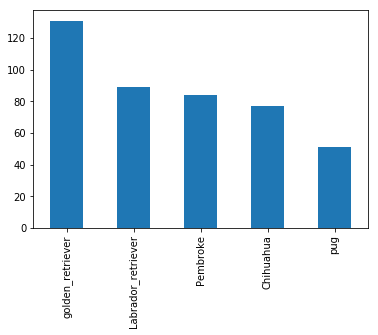

In [87]:
five.plot.bar(legend=False);

We can see that the golden retriever is the most common dog. Now let's find out popularity in terms of ratings and twitter repercusion.

In [88]:
ratings = df.groupby('p1').rating.mean()

In [89]:
count = df.groupby('p1').tweet_id.count()

In [90]:
count = count.to_frame()

In [91]:
ratings = ratings.to_frame()

In [92]:
ratings = ratings.sort_values('rating', ascending = False)

In [93]:
ratings.reset_index(level=0, inplace=True)
count.reset_index(level=0, inplace=True)

In [94]:
rating_count = pd.merge(ratings, count[['p1', 'tweet_id']], on='p1', how='left')

In [95]:
rating_count = rating_count.rename(columns = {'tweet_id':'count'})

In [96]:
fav_count = df.groupby('p1').favourite_count.mean()

In [97]:
retw_count = df.groupby('p1').retweet_count.mean()

In [98]:
fav_count = fav_count.to_frame()
retw_count = retw_count.to_frame()

In [99]:
fav_count.reset_index(level=0, inplace=True)
retw_count.reset_index(level=0, inplace=True)

In [100]:
tw_rates = pd.merge(retw_count, fav_count[['p1', 'favourite_count']], on='p1', how='left')

In [101]:
tw_rates = pd.merge(tw_rates, rating_count[['p1', 'count', 'rating']], on='p1', how='left')

In [102]:
tw_rates.rename(columns = {'retweet_count':'retweet_average'})
tw_rates.rename(columns = {'favourite_count':'fav_average'})
tw_rates.head()

,p1,retweet_count,favourite_count,count,rating
0,Afghan_hound,5976.000000,17326.666667,3,0.966667
1,Airedale,1393.750000,5280.833333,12,0.983333
2,American_Staffordshire_terrier,2204.923077,7559.538462,13,1.100000
3,Appenzeller,1458.000000,7317.500000,2,1.100000
4,Australian_terrier,3078.500000,11127.500000,2,1.150000


Now we will filter this new table by dogs breeds with 20 or more occurrences, in order to perform analysis.

In [103]:
tw_rates_filtered = tw_rates.query('count >= 20')

We will keep the top ten dog breeds in term of retweets, favs and dog rating.

In [104]:
winners_rt = tw_rates_filtered.sort_values('retweet_count', ascending=False).head(10)

In [105]:
winners_fav = tw_rates_filtered.sort_values('favourite_count', ascending=False).head(10)

In [106]:
winners_rating = tw_rates_filtered.sort_values('rating', ascending=False).head(10)

Now we will join the three tables, in order to obtain those dog breeds that were on the three previous 'top ten' rankings.

In [107]:
dfs = [winners_rt[['p1','retweet_count']], winners_fav[['p1','favourite_count']], winners_rating[['p1','rating']]]


In [108]:
from functools import reduce
winners = reduce(lambda left,right: pd.merge(left,right,on='p1'), dfs)


Now we get our list of winners.

In [109]:
winners

,p1,retweet_count,favourite_count,rating
0,French_bulldog,4683.923077,17913.000000,1.126923
1,Samoyed,4420.684211,12938.184211,1.165789
2,Labrador_retriever,3988.921348,12281.988764,1.120225
3,cocker_spaniel,3864.769231,12135.576923,1.134615
4,golden_retriever,3685.404580,12504.083969,1.155725
5,Pembroke,3214.297619,11359.678571,1.152381
6,chow,3006.368421,10386.710526,1.168421


In [110]:
#multiplying rating by 10000 in order to visualize it better.
winners['rating'] = winners['rating'] * 10000

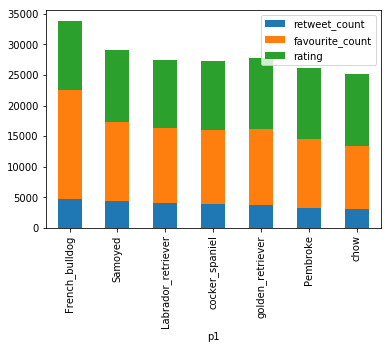

In [111]:
winners.plot.bar(stacked=True, x= 'p1')

The french bulldog would be the most popular dog breed on Twitter according to this analysis.